# The New York Airbnb Open Data 2024 Data Analysis by Wil Oshoke

## Step 1: Installing & Importing Necessary Python Libraries 

### Step 1.1: Installing All Required Libraries

In [ ]:
!pip install pandas -q
!pip install numpy -q
!pip install matplotlib -q
!pip install seaborn -q
!pip install plotly -q
!pip install folium -q
!pip install scikit-learn -q
!pip install statsmodels -q

### Step 1.2: Importing Libraries with Aliases

In [2]:
import pandas as pd  # Importing pandas for data manipulation
import numpy as np  # Importing numpy for numerical operations
import matplotlib.pyplot as plt   # Importing pyplot from matplotlib for plotting
import seaborn as sns   # Importing seaborn for statistical data visualization
import plotly.express as px   # Importing plotly.express for interactive plots
import folium   # Importing folium for interactive maps
import sklearn   # Importing scikit-learn for machine learning
import statsmodels.api as sm   # Importing statsmodels for statistical modeling

## Step 2: Data Analyses Guide

### Step 2.1: Data Loading and Cleaning

#### Explore the dataset with .info(), .head() and .describe()

In [16]:
url = "https://raw.githubusercontent.com/Wil-Oshoke/The-New-York-Airbnb-Open-Data-2024-/refs/heads/main/new_york_listings_2024.csv"
df = pd.read_csv(url)
#df.head.info()
#df.describe()
#df.head()

### Step 2.2: Exploratory Data Analysis (EDA)

#### Price Analysis by Neighborhood and Room Type

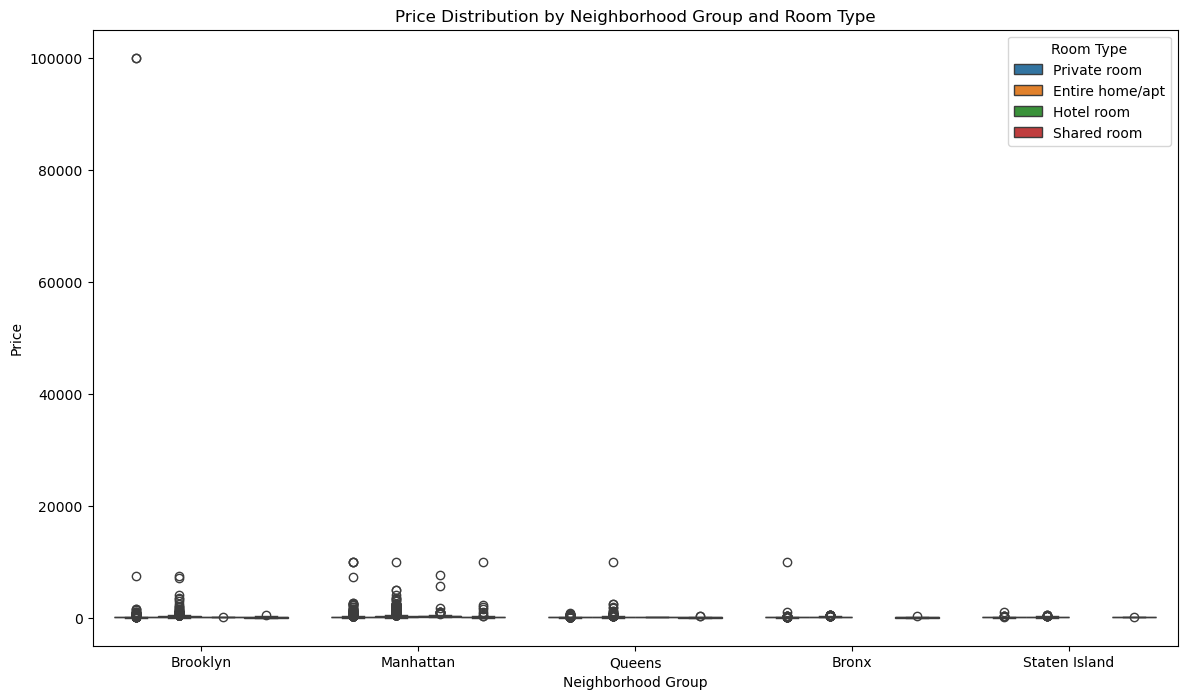

In [21]:

# Group by 'neighbourhood_group', 'neighbourhood', and 'room_type' and calculate price statistics
price_stats = df.groupby(['neighbourhood_group', 'neighbourhood', 'room_type'])['price'].agg(['mean', 'median', 'min', 'max']).reset_index()

# Visualization 1: Box plot of price distribution across neighborhoods
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='neighbourhood_group', y='price', hue='room_type')
plt.title('Price Distribution by Neighborhood Group and Room Type')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.legend(title='Room Type')
plt.show()

#note that there are extreme outliers in the price of rental unit in Brooklyn by Bobby
#This is filtered out in the next analysis

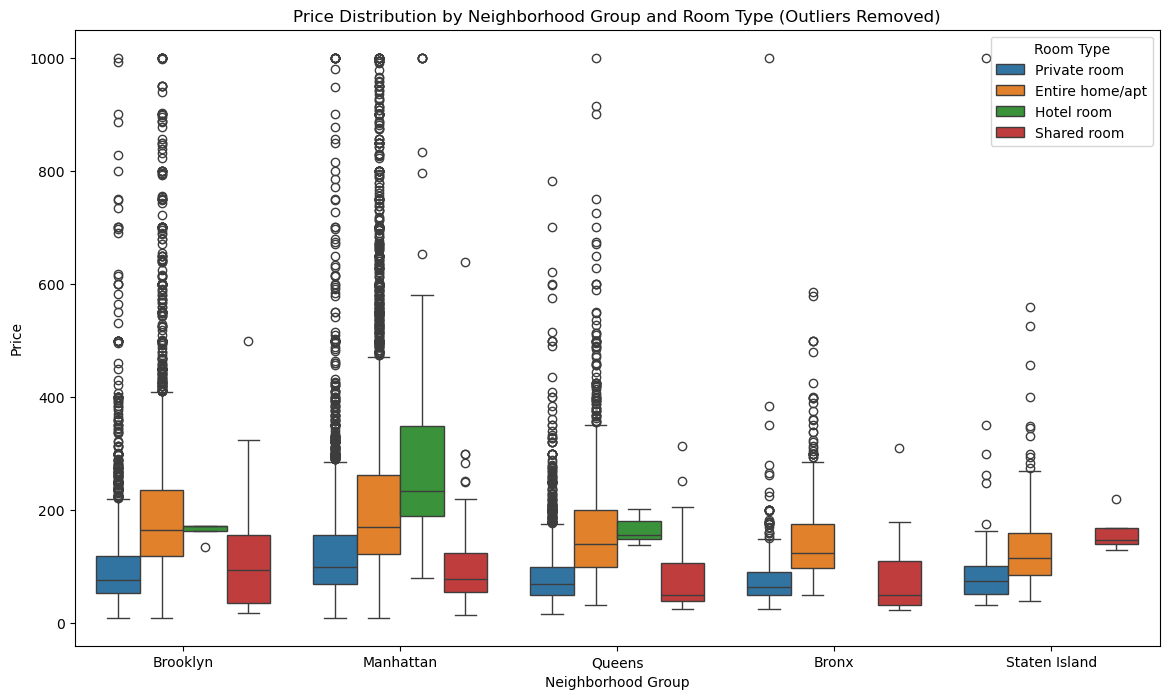

In [24]:
# Filter out extreme prices (e.g., prices over 1000)
df_filtered = df[df['price'] <= 1000]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_filtered, x='neighbourhood_group', y='price', hue='room_type')
plt.title('Price Distribution by Neighborhood Group and Room Type (Outliers Removed)')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.legend(title='Room Type')
plt.show()

#### Host Activity and Availability Analysis

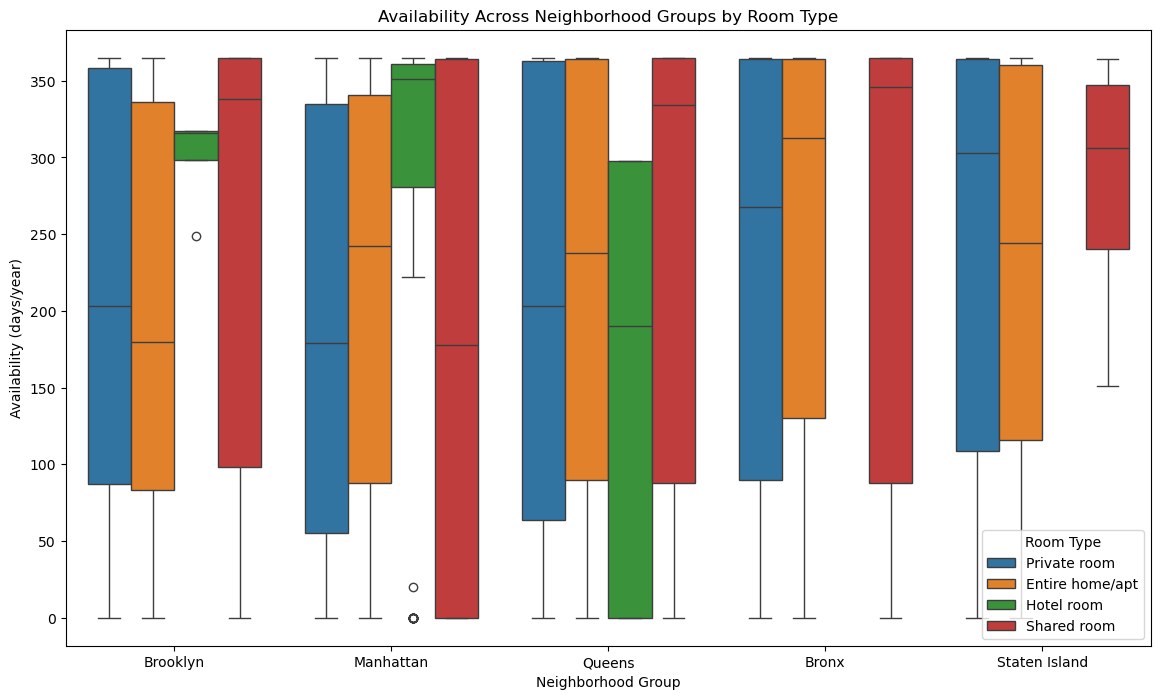

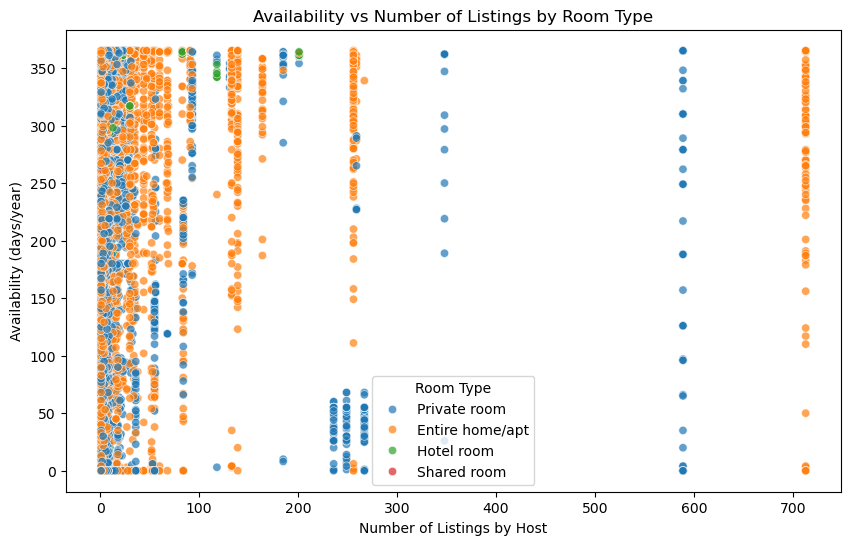

Correlation between number of listings and availability:
                                 calculated_host_listings_count  \
calculated_host_listings_count                        1.000000   
availability_365                                      0.046338   

                                availability_365  
calculated_host_listings_count          0.046338  
availability_365                        1.000000  


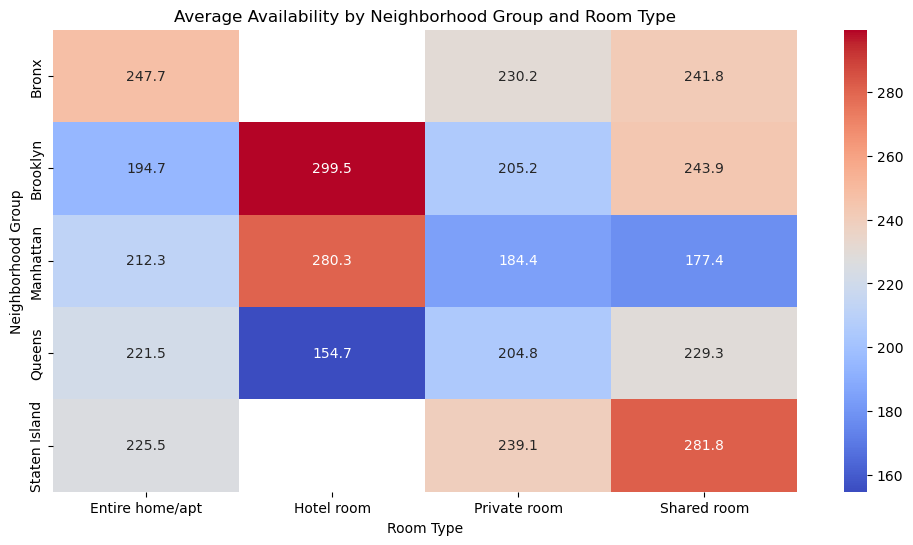

In [26]:
# Step 1: Calculate Summary Statistics for Availability by Host, Room Type, and Neighborhood
availability_stats = df.groupby(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type']).agg(
    average_availability=('availability_365', 'mean'),
    total_listings=('calculated_host_listings_count', 'sum')
).reset_index()

# Step 2: Visualize Availability Trends Across Neighborhoods and Room Types

# Availability by Neighborhood Group and Room Type
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='neighbourhood_group', y='availability_365', hue='room_type')
plt.title('Availability Across Neighborhood Groups by Room Type')
plt.xlabel('Neighborhood Group')
plt.ylabel('Availability (days/year)')
plt.legend(title='Room Type')
plt.show()

# Step 3: Availability vs Number of Listings per Host

# Scatter plot to check if hosts with many listings have higher/lower availability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='calculated_host_listings_count', y='availability_365', hue='room_type', alpha=0.7)
plt.title('Availability vs Number of Listings by Room Type')
plt.xlabel('Number of Listings by Host')
plt.ylabel('Availability (days/year)')
plt.legend(title='Room Type')
plt.show()

# Step 4: Correlation Analysis - Are availability and host listing counts correlated?

# Calculate the correlation between calculated_host_listings_count and availability_365
correlation = df[['calculated_host_listings_count', 'availability_365']].corr()
print("Correlation between number of listings and availability:\n", correlation)

# Step 5: Availability Heatmap by Neighborhood and Room Type

# Pivot data for heatmap
availability_pivot = df.pivot_table(
    values='availability_365', 
    index='neighbourhood_group', 
    columns='room_type', 
    aggfunc='mean'
)

# Heatmap of average availability by neighborhood group and room type
plt.figure(figsize=(12, 6))
sns.heatmap(availability_pivot, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Average Availability by Neighborhood Group and Room Type')
plt.xlabel('Room Type')
plt.ylabel('Neighborhood Group')
plt.show()

### Review Analysis Over Time

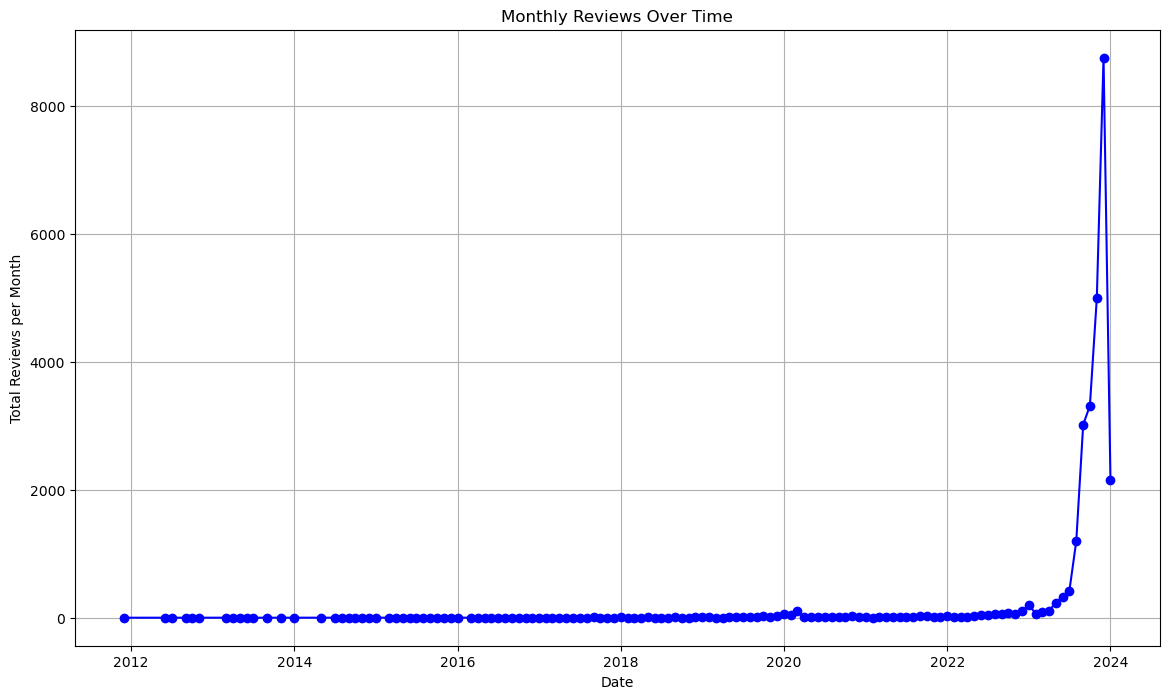

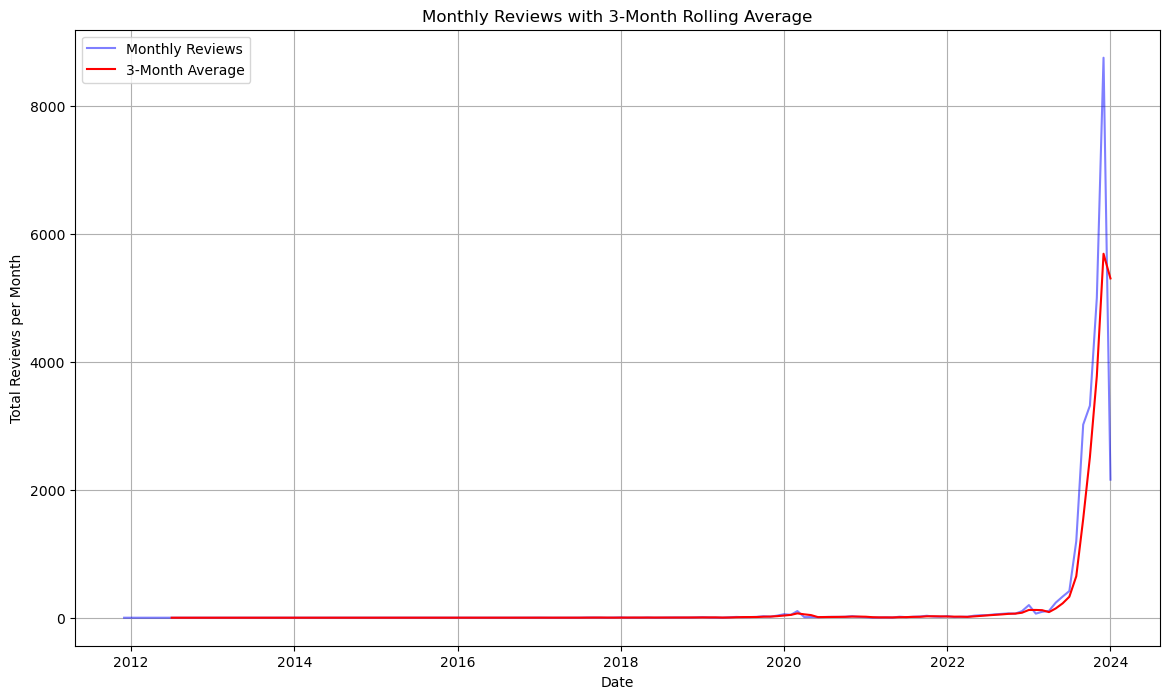

In [27]:
# Ensure 'last_review' is a datetime column
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Step 1: Create a Monthly Time Series of Reviews

# Extract year and month from 'last_review' for aggregation
df['review_year_month'] = df['last_review'].dt.to_period('M')

# Aggregate the total reviews per month across all listings
monthly_reviews = df.groupby('review_year_month')['reviews_per_month'].sum().reset_index()
monthly_reviews['review_year_month'] = monthly_reviews['review_year_month'].dt.to_timestamp()

# Step 2: Visualize the Number of Reviews Over Time

plt.figure(figsize=(14, 8))
plt.plot(monthly_reviews['review_year_month'], monthly_reviews['reviews_per_month'], color='blue', marker='o')
plt.title('Monthly Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Total Reviews per Month')
plt.grid(True)
plt.show()

# Step 3: Identify Seasonal Trends (Optional - rolling average for smoothing)

# Calculate a 3-month rolling average to smooth the trend
monthly_reviews['reviews_3mo_avg'] = monthly_reviews['reviews_per_month'].rolling(window=3).mean()

plt.figure(figsize=(14, 8))
plt.plot(monthly_reviews['review_year_month'], monthly_reviews['reviews_per_month'], label='Monthly Reviews', color='blue', alpha=0.5)
plt.plot(monthly_reviews['review_year_month'], monthly_reviews['reviews_3mo_avg'], label='3-Month Average', color='red')
plt.title('Monthly Reviews with 3-Month Rolling Average')
plt.xlabel('Date')
plt.ylabel('Total Reviews per Month')
plt.legend()
plt.grid(True)
plt.show()

High-Performing Listings Summary:
               price  availability_365  minimum_nights
count  14626.000000      14626.000000    14626.000000
mean     175.880418        201.458088       27.722002
std      238.752397        133.373891       25.489317
min       10.000000          0.000000        1.000000
25%       85.000000         87.000000       30.000000
50%      126.000000        188.000000       30.000000
75%      199.000000        346.000000       30.000000
max    10000.000000        365.000000     1124.000000
Low-Performing Listings Summary:
                price  availability_365  minimum_nights
count    2380.000000       2380.000000     2380.000000
mean      254.113025        215.660084       29.223950
std      2931.215586        139.479908       55.676283
min        18.000000          0.000000        1.000000
25%        69.000000         89.000000       30.000000
50%       110.000000        249.000000       30.000000
75%       175.000000        363.000000       30.000000
max  

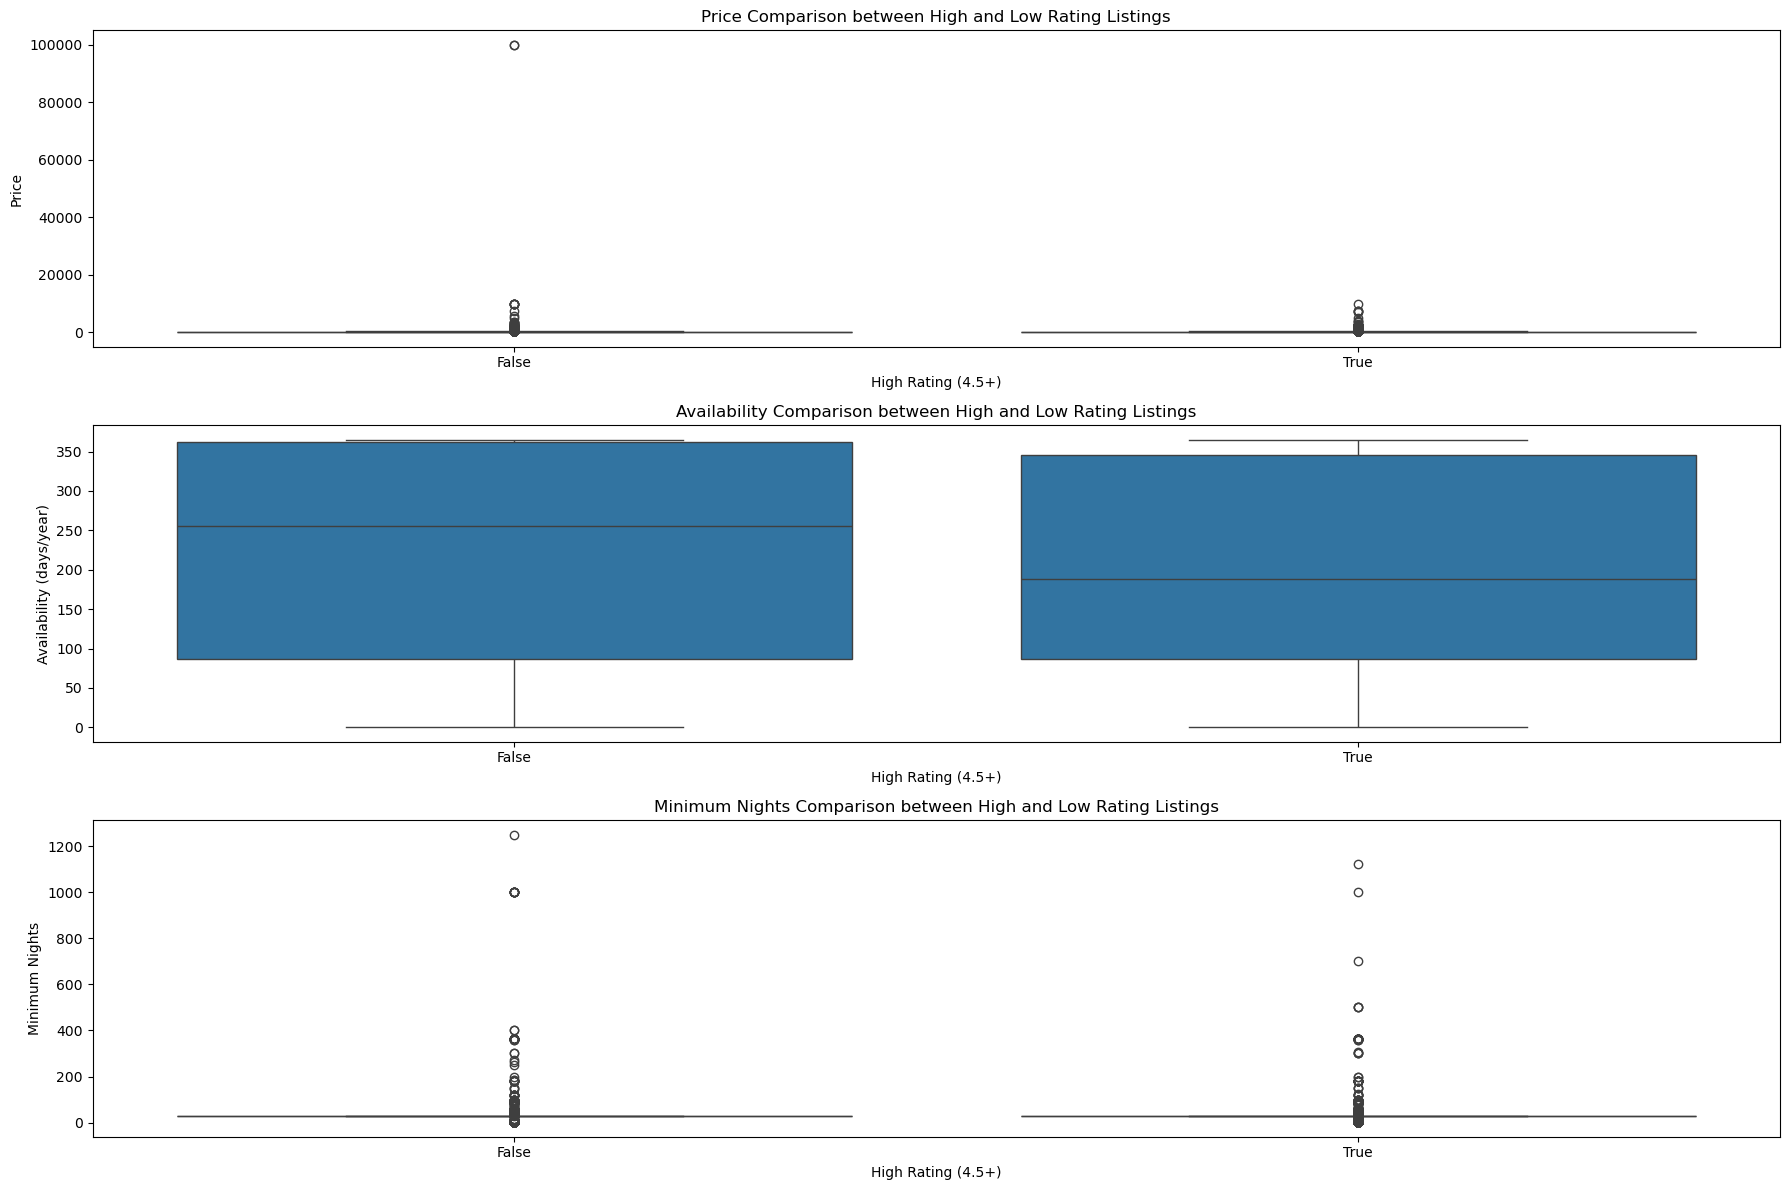

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Ensure `rating` column is numeric, converting non-numeric values to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Step 2: Filter High-Performing and Low-Performing Listings
# Define high-performing listings as those with a rating of 4.5 or higher
high_performing = df[df['rating'] >= 4.5].dropna(subset=['rating'])
low_performing = df[df['rating'] < 4.5].dropna(subset=['rating'])

# Step 3: Compare Prices, Availability, and Minimum Nights Between Groups

# Create a summary of statistics for both groups
high_perf_stats = high_performing[['price', 'availability_365', 'minimum_nights']].describe()
low_perf_stats = low_performing[['price', 'availability_365', 'minimum_nights']].describe()

print("High-Performing Listings Summary:\n", high_perf_stats)
print("Low-Performing Listings Summary:\n", low_perf_stats)

# Step 4: Visualize the Differences

# Set up the figure layout
plt.figure(figsize=(18, 12))

# Price Comparison
plt.subplot(3, 1, 1)
sns.boxplot(data=df, x=(df['rating'] >= 4.5), y='price')
plt.title('Price Comparison between High and Low Rating Listings')
plt.xlabel('High Rating (4.5+)')
plt.ylabel('Price')

# Availability Comparison
plt.subplot(3, 1, 2)
sns.boxplot(data=df, x=(df['rating'] >= 4.5), y='availability_365')
plt.title('Availability Comparison between High and Low Rating Listings')
plt.xlabel('High Rating (4.5+)')
plt.ylabel('Availability (days/year)')

# Minimum Nights Comparison
plt.subplot(3, 1, 3)
sns.boxplot(data=df, x=(df['rating'] >= 4.5), y='minimum_nights')
plt.title('Minimum Nights Comparison between High and Low Rating Listings')
plt.xlabel('High Rating (4.5+)')
plt.ylabel('Minimum Nights')

plt.tight_layout()
plt.show()